In [1]:
from matchms.importing import load_from_mgf
from tqdm import tqdm

# neg_val_spectra = list(tqdm(load_from_mgf("../../../ms2deepscore/data/pytorch/new_corinna_included/training_and_validation_split/negative_validation_spectra.mgf")))
# neg_test_spectra = list(tqdm(load_from_mgf("../../../ms2deepscore/data/pytorch/new_corinna_included/training_and_validation_split/negative_testing_spectra.mgf")))
# neg_train_spectra = list(tqdm(load_from_mgf("../../../ms2deepscore/data/pytorch/new_corinna_included/training_and_validation_split/negative_training_spectra.mgf")))
# neg_spectra = neg_val_spectra + neg_test_spectra + neg_train_spectra

pos_val_spectra = list(tqdm(load_from_mgf("../../../ms2deepscore/data/pytorch/new_corinna_included/training_and_validation_split/positive_validation_spectra.mgf")))
pos_test_spectra = list(tqdm(load_from_mgf("../../../ms2deepscore/data/pytorch/new_corinna_included/training_and_validation_split/positive_testing_spectra.mgf")))
pos_train_spectra = list(tqdm(load_from_mgf("../../../ms2deepscore/data/pytorch/new_corinna_included/training_and_validation_split/positive_training_spectra.mgf")))
pos_spectra = pos_val_spectra + pos_test_spectra + pos_train_spectra

25412it [00:23, 1101.82it/s]
24911it [00:22, 1097.09it/s]
469257it [06:37, 1179.93it/s]


In [17]:
my_set = set("bye")
my_set.add("hello")

In [15]:
my_set.add("bye")

In [27]:
pos_spectra[1].get("formula")


'C12H15NO3'

# Split spectra on the same parent mass

In [102]:
spectra_per_formula = {}
for spectrum in tqdm(pos_spectra):
    formula = spectrum.get("formula")

    # parent_mass = float(spectrum.get("parent_mass"))
    # rounded_mass = str(round(parent_mass, 1))
    inchikey = spectrum.get("inchikey")[:14]
    
    if formula not in spectra_per_formula:
        spectra_per_formula[formula] = dict()
    if inchikey not in spectra_per_formula[formula]:
        spectra_per_formula[formula][inchikey] = []
    spectra_per_formula[formula][inchikey].append(spectrum)
    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 519580/519580 [00:05<00:00, 99163.92it/s]


In [103]:
len(spectra_per_formula)

20598

In [104]:
for formula in spectra_per_formula:
    if len(spectra_per_formula[formula]) > 3:
        print(formula)
        for inchikey in spectra_per_formula[formula]:
            print(spectra_per_formula[formula][inchikey][0].get("compound_name"))


C12H15NO3
4-(4-hydroxypiperidin-1-yl)benzoic acid
4-(tert-butylcarbamoyl)benzoic acid
ethyl 2-[(3-methylphenyl)carbonylamino]acetate CollisionEnergy:102040
N-methylcorydaldine
4-(4-piperidinyloxy)benzoic acid
2-(tert-butylcarbamoyl)benzoic acid
2-cyclobutoxy-4,6-dimethylpyridine-3-carboxylic acid
6,6-dimethyl-2-oxo-1,2,5,6,7,8-hexahydroquinoline-3-carboxylic acid
Carbofuran
3-(Diethylcarbamoyl)benzoic acid
Metaxalone
N-(4-Ethoxyphenyl)-3-oxobutanamide
Hydrocotarnine
Butylone
benzyl 5-amino-4-oxopentanoate
"2-[(2,4,6-trimethylphenyl)carbonylamino]acetic acid CollisionEnergy:102040"
C11H10N2O2
2-(methylamino)quinoline-4-carboxylic acid
3-(2-methylphenyl)-1H-pyrazole-5-carboxylic acid
3,4-dimethylcinnoline-6-carboxylic acid
5-methyl-1-phenyl-1H-pyrazole-3-carboxylic acid
4-(4-methyl-1H-pyrazol-1-yl)benzoic acid
4-methyl-1-phenyl-1H-pyrazole-3-carboxylic acid
2-cyclopropylimidazo[1,2-a]pyridine-6-carboxylic acid
1-(pyridin-2-ylmethyl)-1H-pyrrole-2-carboxylic acid
1-(O-tolyl)-1H-pyrazole-4-

In [105]:
for inchikey in spectra_per_formula["C8H8O3"]:
    print(spectra_per_formula["C8H8O3"][inchikey][0].get("compound_name"))

3-cyclopropylfuran-2-carboxylic acid
4H,5H,6H-cyclopenta[c]furan-1-carboxylic acid
Methylparaben
Methyl salicylate
Methyl 3-hydroxybenzoate
2-Hydroxyphenylacetic acid
3-Hydroxyphenylacetic acid
o-Anisic acid
4-ACETOXYPHENOL
4-hydroxyphenylacetic acid
3-METHYLSALICYLIC ACID
VANILLIN
2',4'-DIHYDROXYACETOPHENONE
m-Anisic-acid
p-Anisic acid
Atranol
"3',5'-Dihydroxyacetophenone CollisionEnergy:102040"
3-Methyl-4-hydroxybenzoic acid
benzo[d][1,3]dioxol-5-ylmethanol
Benzaldehyde, 2-hydroxy-4-methoxy-
Benzaldehyde, 2-hydroxy-5-methoxy-
2hydroxy_PhenylAceticAcid


Vanillin seems like a nice example, searching on pubchem finds the following examples
- Methylparaben, It is the most frequently used antimicrobial preservative in cosmetics. It occurs naturally in several fruits, particularly in blueberries. It has a role as a plant metabolite, an antimicrobial food preservative, a neuroprotective agent and an antifungal agent.
- vanillin, flavouring agent (vanille)
- method salicylate,  It has a role as a flavouring agent, a metabolite and an insect attractant.
- methyl 3-hydroxybenzoate, It has a role as an antibacterial agent
- 2-hydroxyphenylacetic acid, biomarker? It is a metabolite of phenylalanine and is excreted in the urine of patients suffering from diseases like phenylketonuria
- o-anisic acid, It has a role as a non-steroidal anti-inflammatory drug and a flavouring agent
- 2hydroxy_PhenylAceticAcid, . It is a metabolite of phenylalanine and is excreted in the urine of patients suffering from diseases like phenylketonuria.

### Select example spectra
We select spectra with multiple fragments (more than 5) and the maximum peak as the precursor mz. This will make it suitable as illustrative examples. Since it shows similarity but also differences. 

In [111]:
selected_spectra = []

20


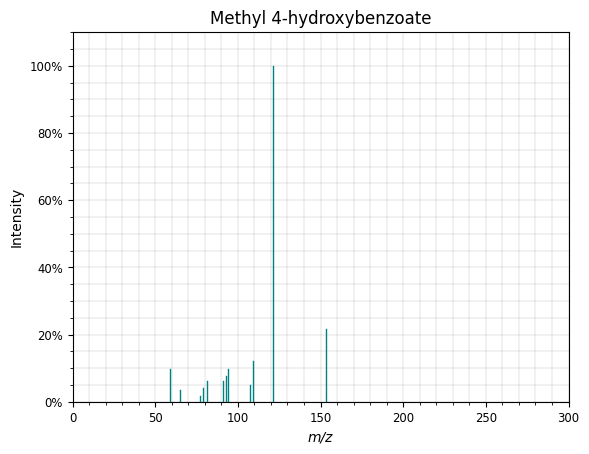

In [112]:
for inchikey in spectra_per_formula["C8H8O3"]:
    if spectra_per_formula["C8H8O3"][inchikey][0].get("compound_name") == "Methylparaben":
        for spectrum in spectra_per_formula["C8H8O3"][inchikey]:
            if len(spectrum.mz) > 5:
                if 150 < spectrum.mz.max() < 160:
                    print(spectrum.get("collision_energy"))
                    selected_spectra.append(spectrum)
                    plot_spectrum(spectrum)
                    plt.show()

10 eV


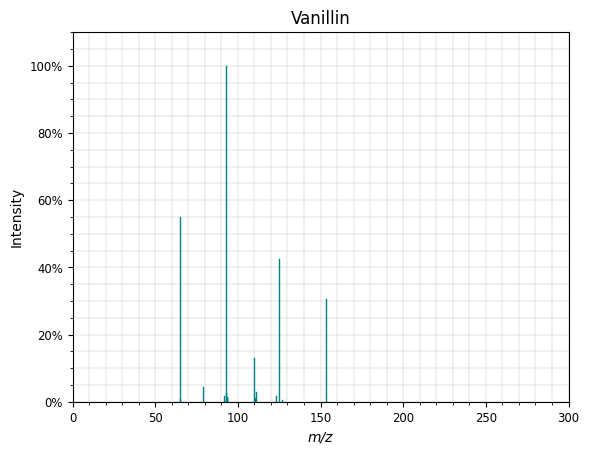

In [113]:
for inchikey in spectra_per_formula["C8H8O3"]:
    if spectra_per_formula["C8H8O3"][inchikey][0].get("compound_name") == "VANILLIN":
        for spectrum in spectra_per_formula["C8H8O3"][inchikey]:
            if len(spectrum.mz) > 5:
                if 150 < spectrum.mz.max() < 160:
                    collision_energy = spectrum.get("collision_energy")
                    # print(spectrum.metadata)
                    if collision_energy is not None:
                        if "10" in spectrum.get("collision_energy"):
                            print(spectrum.get("collision_energy"))
                            selected_spectra.append(spectrum)
                            plot_spectrum(spectrum)
                            plt.show()

10 eV


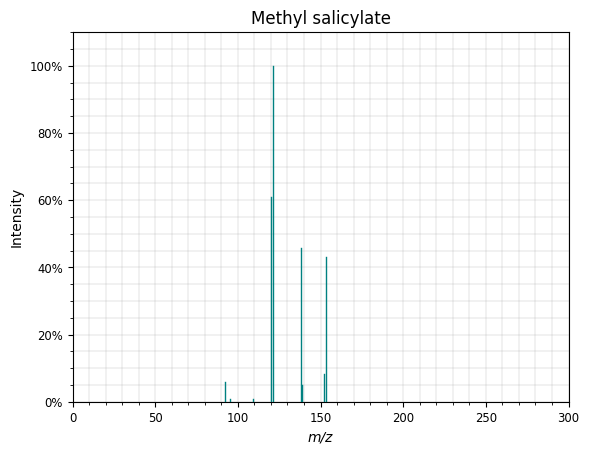

In [114]:
for inchikey in spectra_per_formula["C8H8O3"]:
    if spectra_per_formula["C8H8O3"][inchikey][0].get("compound_name") == "Methyl salicylate":
        for spectrum in spectra_per_formula["C8H8O3"][inchikey]:
            if len(spectrum.mz) > 5:
                if 150 < spectrum.mz.max() < 160:
                    if "10" in spectrum.get("collision_energy"):
                        print(spectrum.get("collision_energy"))
                        selected_spectra.append(spectrum)
                        plot_spectrum(spectrum)
                        plt.show()

In [100]:
selected_spectra[1].set("compound_name", "Vanillin") # Remove the full caps

Spectrum(precursor m/z=153.05, 18 fragments between 65.0 and 153.1)

In [ ]:
selected_spectra[1].set("compound_name", "Vanillin") # Remove the full caps

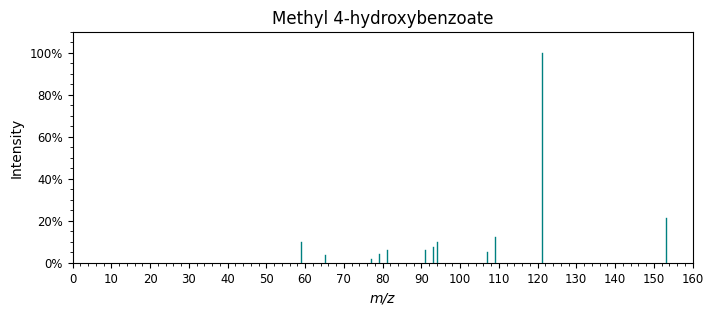

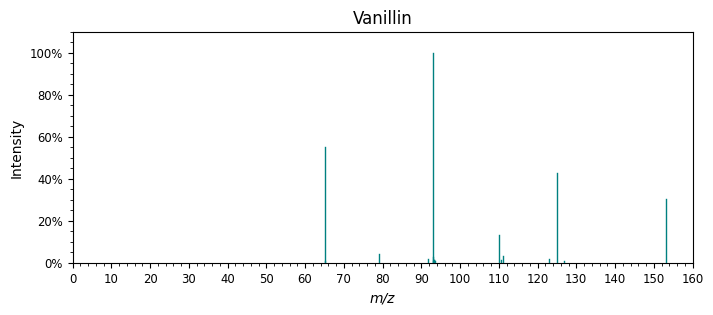

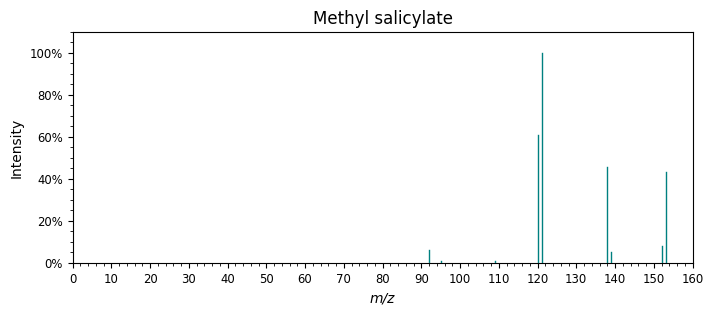

In [117]:
for spectrum in selected_spectra:
    plt.figure(figsize=(8, 3))

    plot_spectrum(spectrum, max_mz=160, grid=False)
    plt.xticks([i for i in range(0, 170, 10)]) 
    plt.savefig(spectrum.get("compound_name") + "_example.svg", format="svg", bbox_inches="tight")

    plt.show()


# Draw structures

Methyl 4-hydroxybenzoate


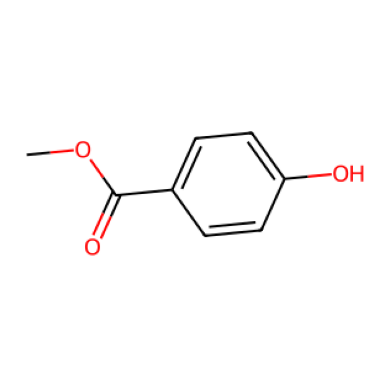

Vanillin


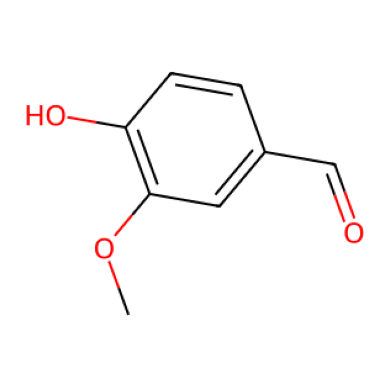

Methyl salicylate


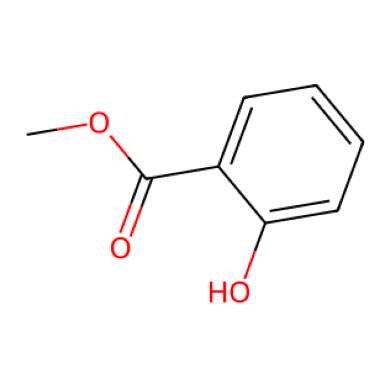

In [118]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt


for spectrum in selected_spectra:
    smiles = spectrum.get("smiles")
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol)
    # Display the image using Matplotlib
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.axis("off")  # Hide axes
    print(spectrum.get("compound_name"))
    plt.savefig(spectrum.get("compound_name") + "_example_structure.svg", format="svg", bbox_inches="tight")

    plt.show()

32


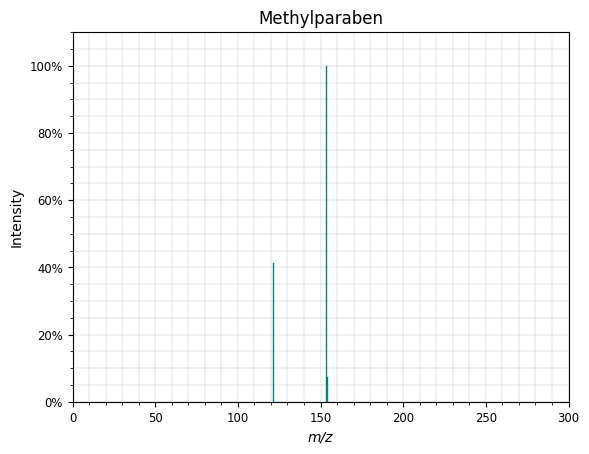

10


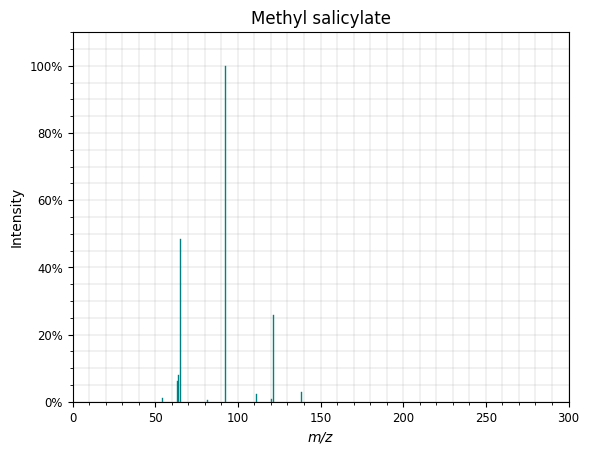

15


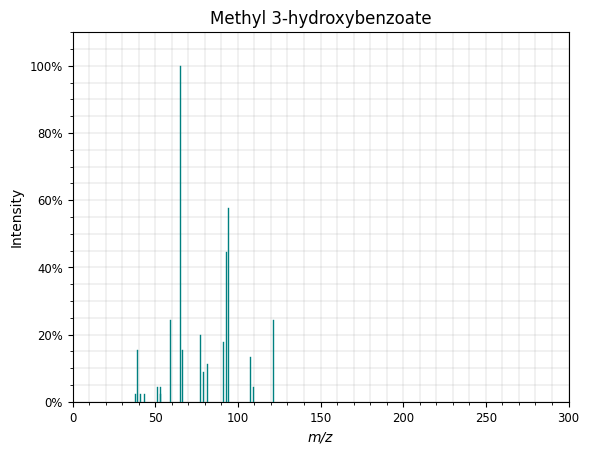

28


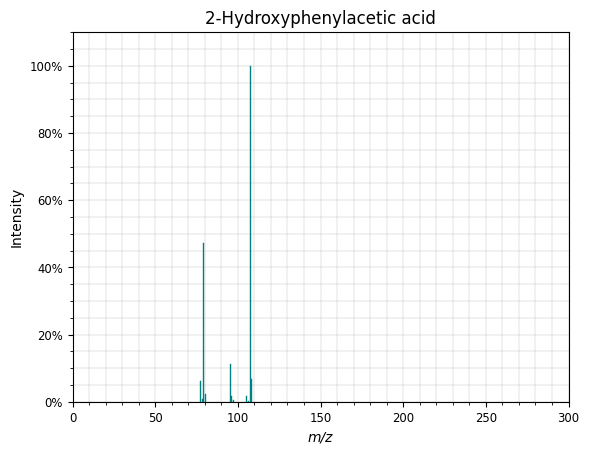

23


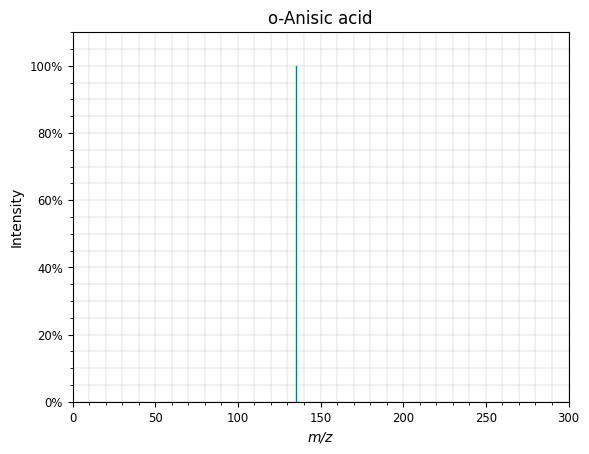

475


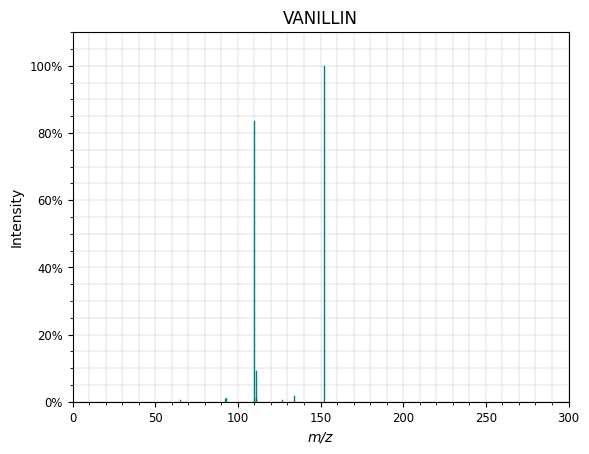

8


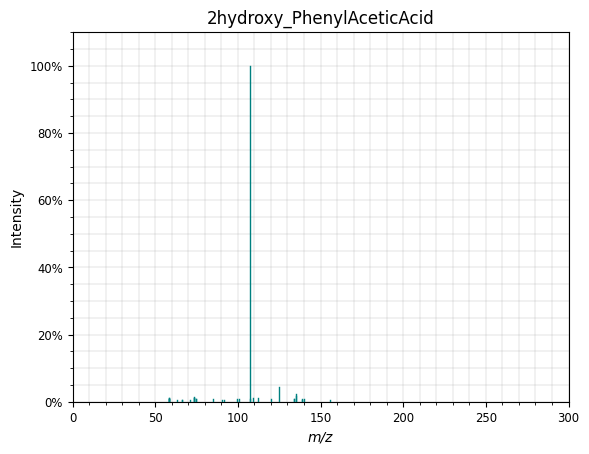

In [40]:
from matchms.plotting.spectrum_plots import plot_spectrum
import matplotlib.pyplot as plt

for inchikey in spectra_per_formula["C8H8O3"]:
    if spectra_per_formula["C8H8O3"][inchikey][0].get("compound_name") in ("Methylparaben", "VANILLIN", 
                                                                           "Methyl salicylate", "Methyl 3-hydroxybenzoate", 
                                                                           "2-Hydroxyphenylacetic acid", "o-Anisic acid",
                                                                           "2hydroxy_PhenylAceticAcid"):
        print(len(spectra_per_formula["C8H8O3"][inchikey]))
        plot_spectrum(spectra_per_formula["C8H8O3"][inchikey][0])
        